**Visualizing Naive Bayes**

In the following exercise, you are going to make a visual inspection of the tweets dataset using the Naïve Bayes features. We will see how we can understand the log-likelihood ratio explained in the videos as a pair of numerical features that can be fed in a machine learning algorithm.

At the end of this lab, we will introduce the concept of confidence ellipse as a tool for representing the Naïve Bayes model visually

In [4]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from utils import confidence_ellipse 

**Calculate the likelihoods for each tweet**

For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.

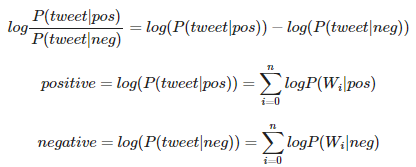

In [6]:
data = pd.read_csv('C:\\Users\\Mit\\Documents\\PythonProjects\\NLP\\Natural-Language-Processing-Specialization\\VectorSpace\\Week2\\bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


In [7]:
len(data)

8000

Text(0, 0.5, 'Negative')

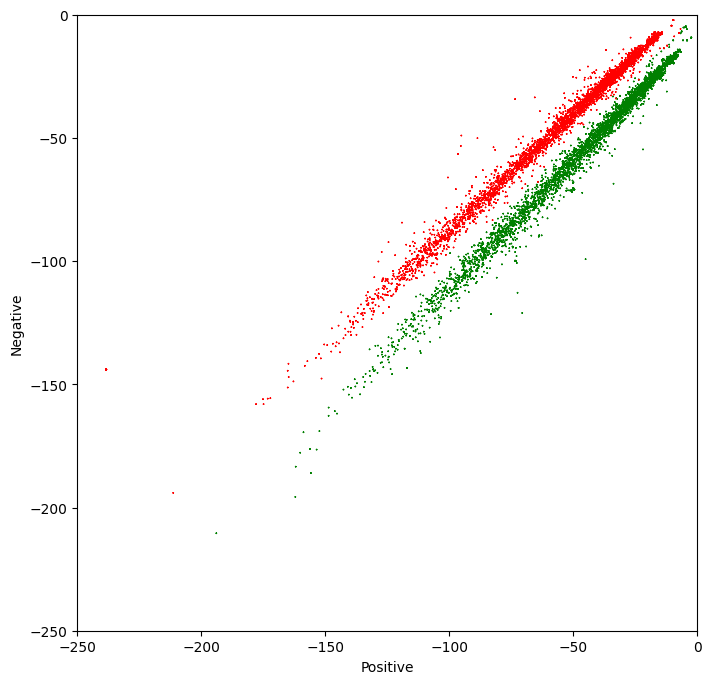

In [8]:
fig, ax = plt.subplots(figsize = (8,8))

colors = ['red', 'green'] 

ax.scatter(data['positive'], data['negative'], c = [colors[int(k)] for k in data["sentiment"]], s = 0.1, marker = '*')

plt.xlim(-250, 0)
plt.ylim(-250, 0)

plt.xlabel("Positive")
plt.ylabel("Negative")

**Using Confidence Ellipses to interpret Naïve Bayes**

In this section, we will use the confidence ellipse to give us an idea of what the Naïve Bayes model see.

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters:

Center: It is the numerical mean of the attributes
Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse.
Angle: Related with the covariance among attributes.
The parameter n_std stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

About 68% of the area under the curve falls within 1 standard deviation around the mean.
About 95% of the area under the curve falls within 2 standard deviations around the mean.
About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

In [12]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

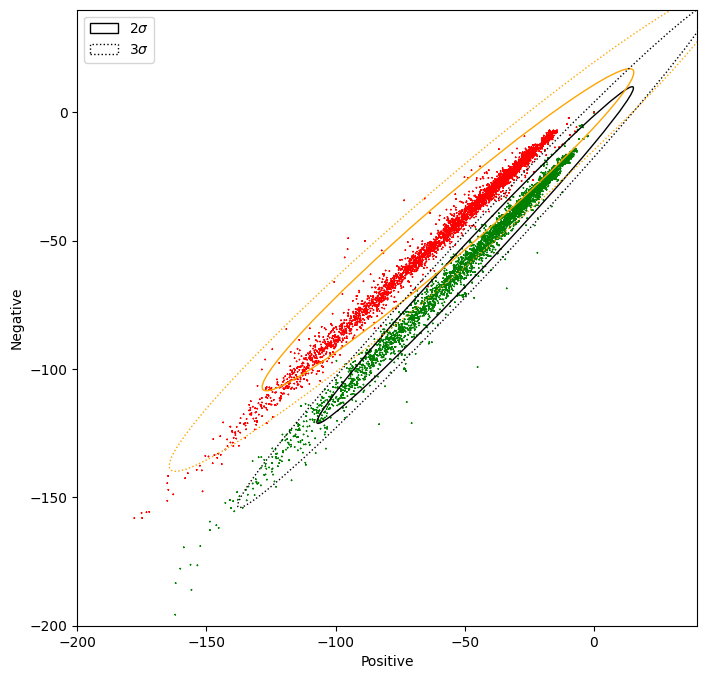

In [13]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()